In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import matplotlib.gridspec as gridspec
from scipy import stats 
import seaborn as sns 
sns.set_style('whitegrid')

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,RandomizedSearchCV,train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm 


In [6]:
train=pd.read_csv('train_advanced.csv')
test=pd.read_csv('test_advanced.csv')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
test_id=test['Id']

In [21]:
train.drop('Id',inplace=True, axis=1)
test.drop('Id',inplace=True,axis=1)
test.shape

(1459, 79)

Salesprice Feature Analaysis

In [22]:
df=train

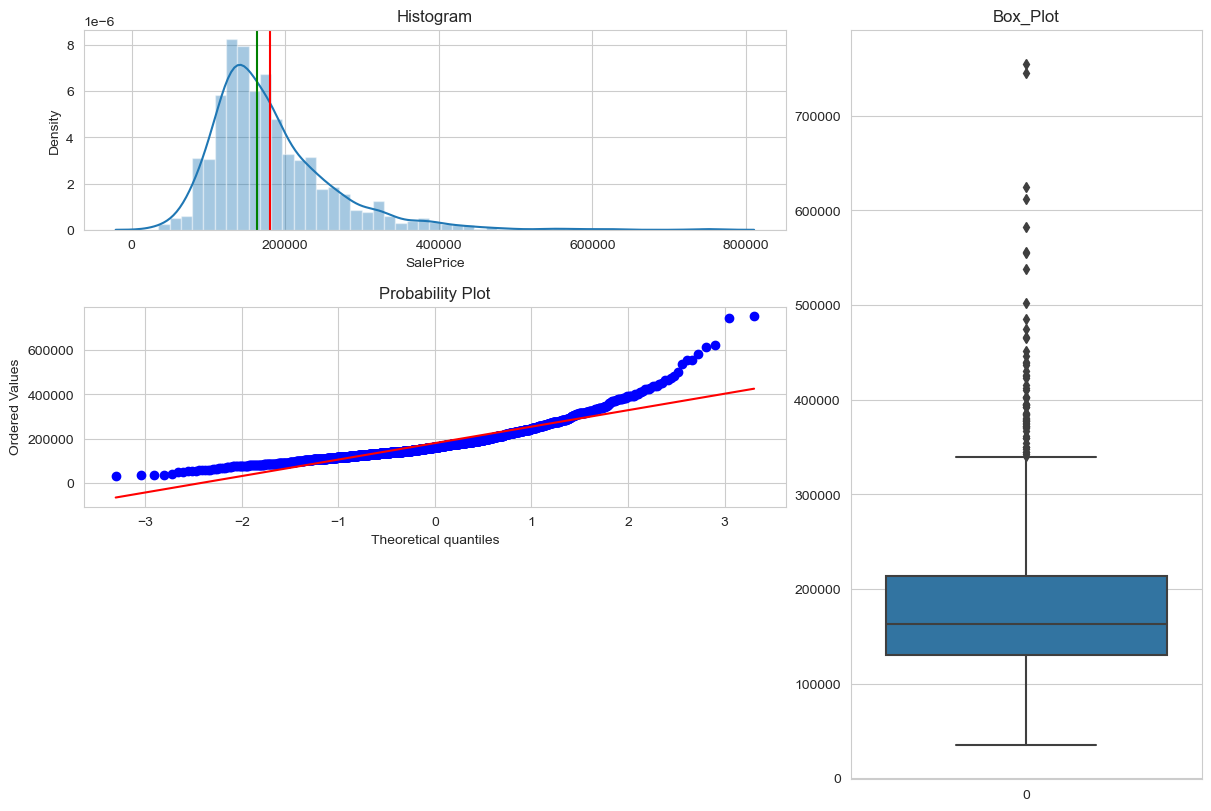

In [24]:
def three_chart_plot(df, feature):
    fig=plt.figure(constrained_layout=True, figsize=(12,8))
    grid=gridspec.GridSpec(ncols=3,nrows=3, figure=fig)
    
    ax1=fig.add_subplot(grid[0:2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:,feature],norm_hist=True, ax=ax1)
    plt.axvline(x=df[feature].mean(), c='red')
    plt.axvline(x=df[feature].median(),c='green')
    
    ax2=fig.add_subplot(grid[1,:2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature],plot=ax2)
    
    ax3=fig.add_subplot(grid[:,2])
    ax3.set_title('Box_Plot')
    sns.boxplot(df.loc[:,feature],orient='v',ax=ax3)
    
three_chart_plot(df,'SalePrice')

In [27]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


In [32]:
import missingno as msno

<Axes: >

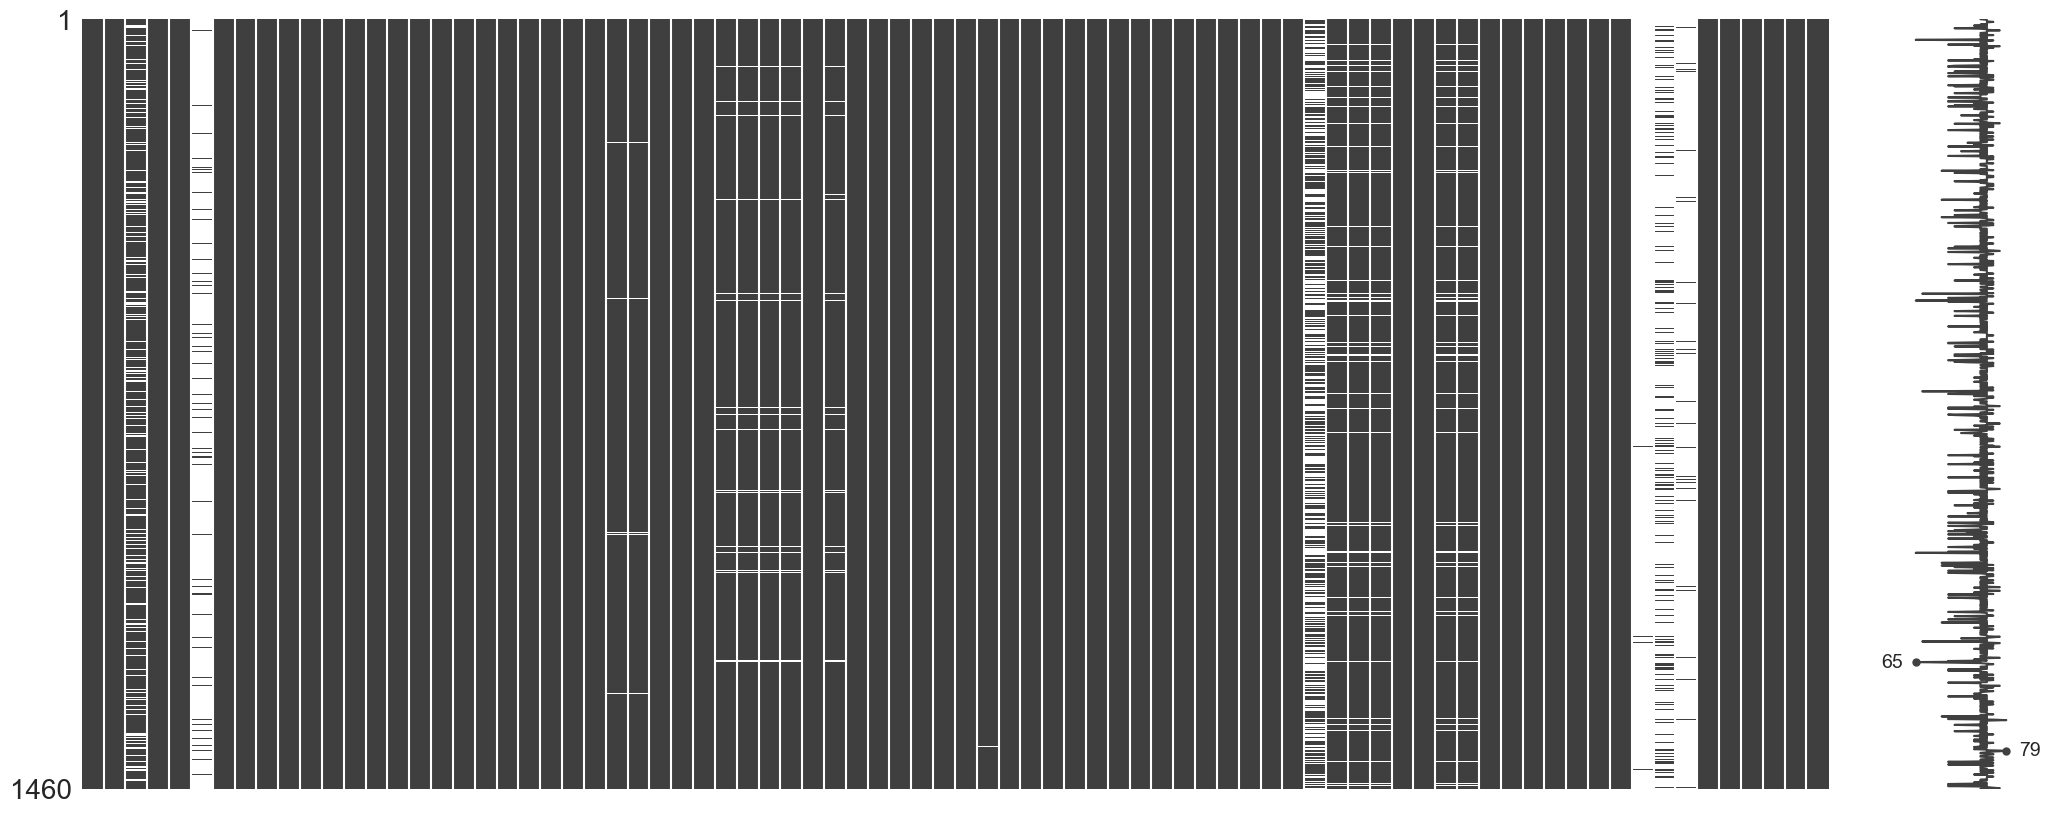

In [33]:
%matplotlib inline 
msno.matrix(train)

<Axes: >

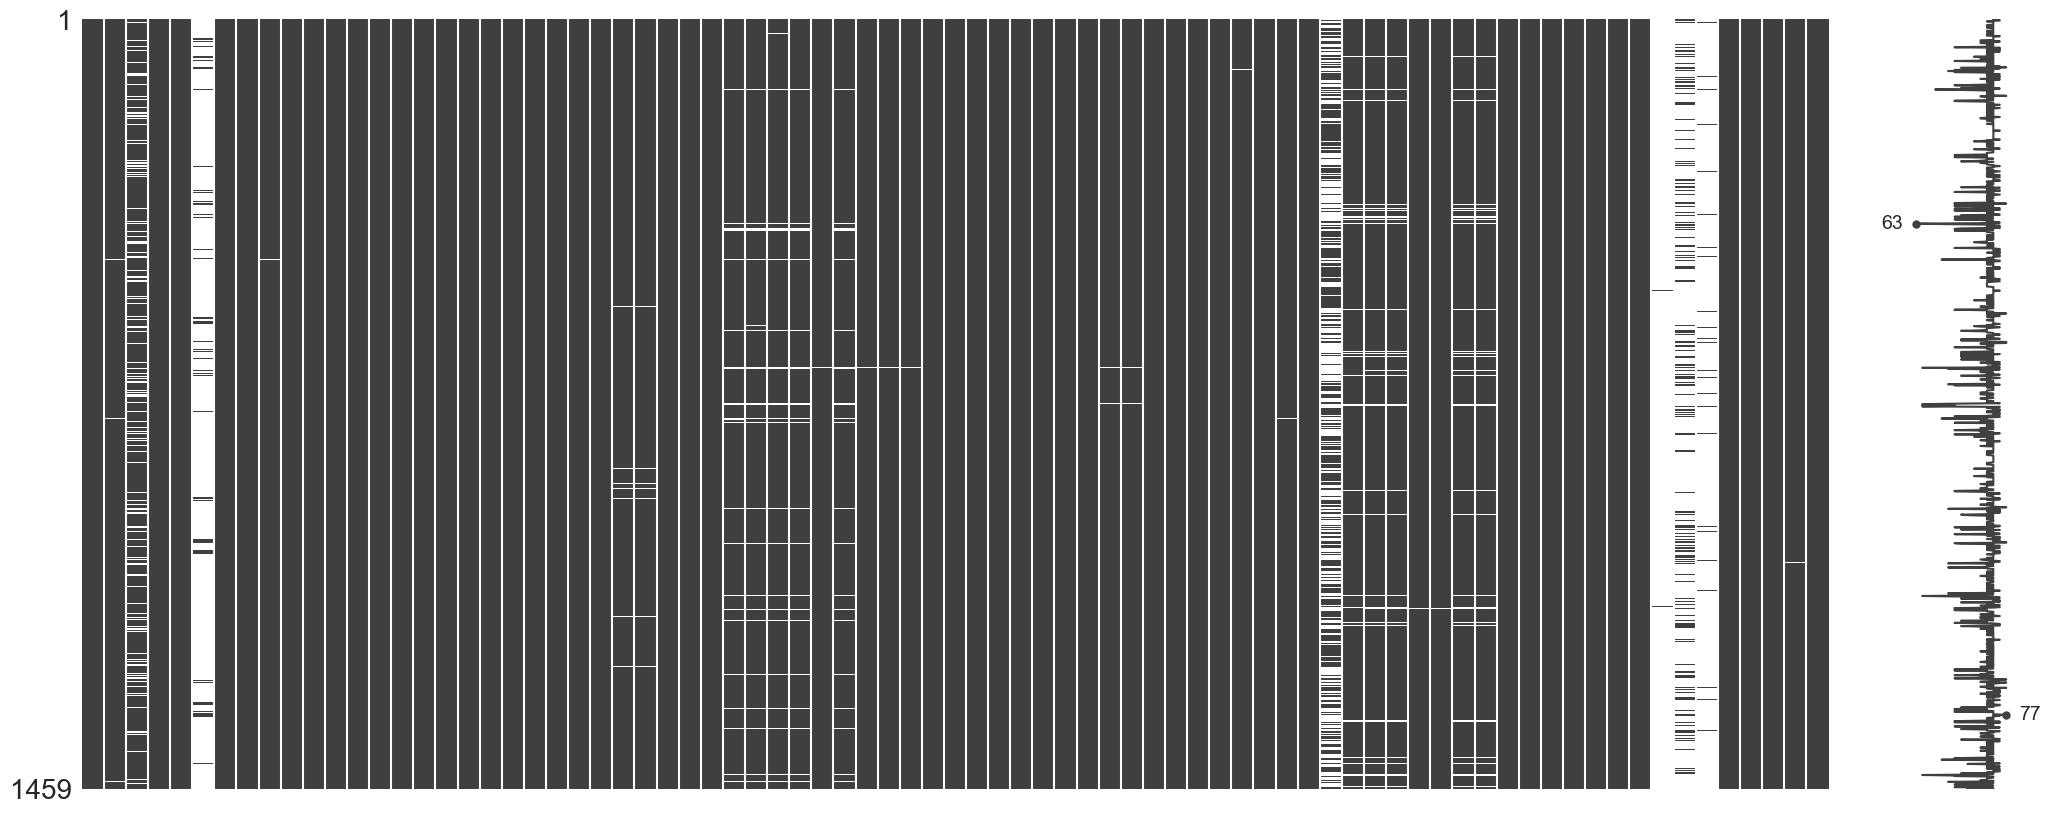

In [34]:
msno.matrix(test)

In [35]:
def null_table(data):
    indices=data.isnull().sum().index
    values=data.isnull().sum().values
    percentage=[]
    for i in indices:
        percentage.append((data[i].isnull().sum()/data[i].shape[0])*100)
    d ={'Columns':indices, 'Count of Null Values':values, 'Aproximate Percentage of Null Values':percentage}
    
    null_frame=pd.DataFrame(data=d)
    return null_frame

In [39]:
null_frame_train=null_table(df)
null_frame_train.sort_values(by='Aproximate Percentage of Null Values',ascending=False).tail()

,Columns,Count of Null Values,Aproximate Percentage of Null Values
38,Heating,0,0.0
39,HeatingQC,0,0.0
1,MSZoning,0,0.0
42,1stFlrSF,0,0.0
79,SalePrice,0,0.0


<Axes: >

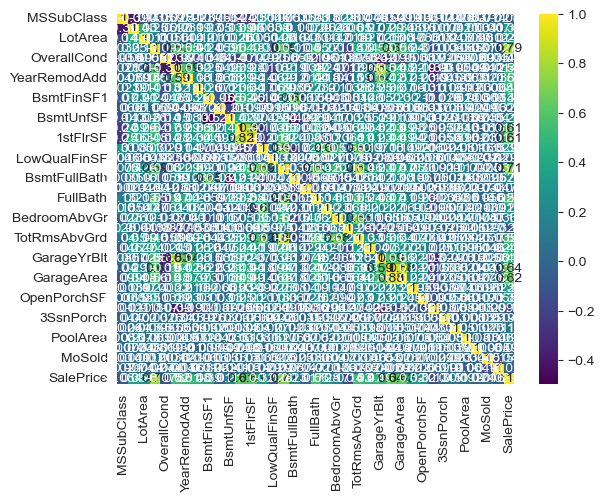

In [42]:
sns.heatmap(train.corr(), cmap='viridis',annot=True)

In [44]:
high_corr=train.corr().abs().unstack().sort_values(ascending=False)

In [50]:
high_corr[40:60]

GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
              GrLivArea       0.708624
GrLivArea     SalePrice       0.708624
              2ndFlrSF        0.687501
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
BsmtFullBath  BsmtFinSF1      0.649212
GarageYrBlt   YearRemodAdd    0.642277
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
SalePrice     GarageCars      0.640409
GrLivArea     FullBath        0.630012
dtype: float64

In [53]:
na=train.shape[0]
nb=test.shape[0]
Y_train=train['SalePrice'].to_frame()

total= pd.concat((train,test),sort=False).reset_index(drop=True)
total.drop(['SalePrice'], axis=1, inplace=True)
total.shape

(2919, 79)

In [55]:
category_var=df.select_dtypes(include='object')
num_var=df.select_dtypes(exclude='object')

print("Categorical Features:",category_var.shape[1])
print("Numerical Features:",num_var.shape[1])

Categorical Features: 43
Numerical Features: 37


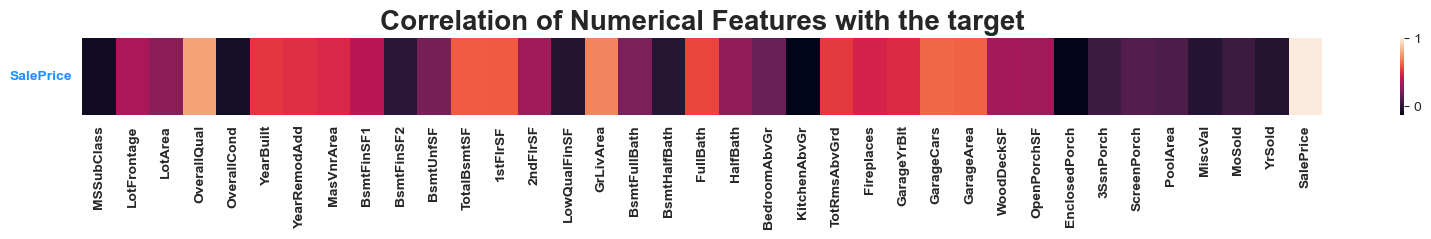

In [67]:
num=df.select_dtypes(exclude='object')
corr_num=num.corr()

f, ax= plt.subplots(figsize=(20,1))

sns.heatmap(corr_num.sort_values(by=['SalePrice'],ascending=False).head(1))

plt.title('Correlation of Numerical Features with the target',weight='bold',fontsize=20)
plt.xticks(weight='bold')
plt.yticks(weight='bold',color='dodgerblue',rotation=0)

plt.show()

In [68]:
correlation=df.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(15)
cmap=sns.light_palette('cyan',as_cmap=True)
s=correlation.style.background_gradient(cmap=cmap)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


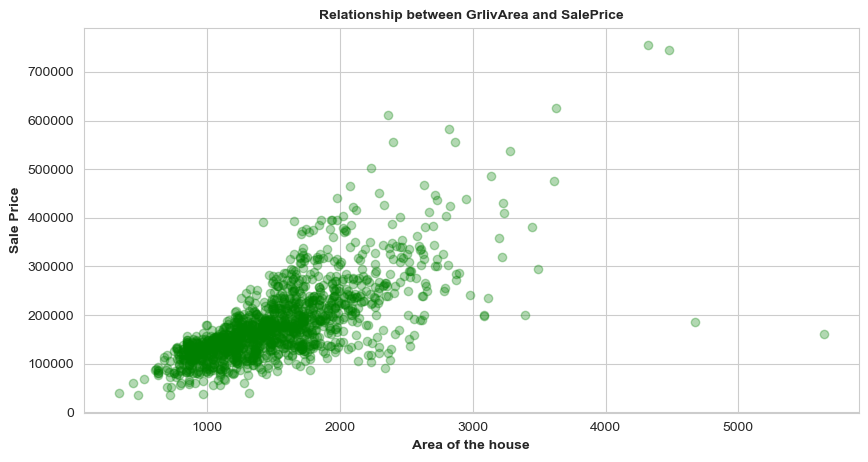

In [71]:
plt.figure(figsize=((10,5)))
plt.scatter(x='GrLivArea',y='SalePrice',data=df, color='green',alpha=0.3)
plt.title('Relationship between GrlivArea and SalePrice',weight='bold',fontsize=10)
plt.xlabel('Area of the house', weight='bold')
plt.ylabel('Sale Price',weight='bold')
plt.show()

    Dropping the Outliers of GrLivArea

In [72]:
train=train[train['GrLivArea']<4500]
df=train

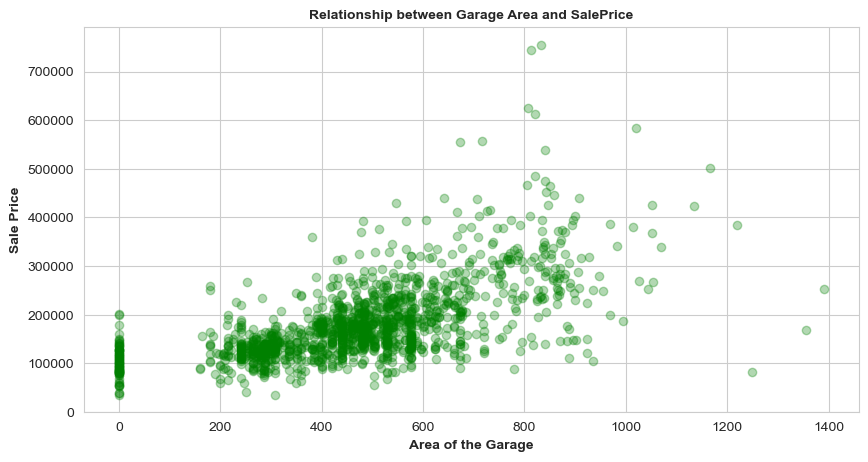

In [73]:
plt.figure(figsize=((10,5)))
plt.scatter(x='GarageArea',y='SalePrice',data=df, color='green',alpha=0.3)
plt.title('Relationship between Garage Area and SalePrice',weight='bold',fontsize=10)
plt.xlabel('Area of the Garage', weight='bold')
plt.ylabel('Sale Price',weight='bold')
plt.show()

In [74]:
train=train[train['GarageArea']<1200]
df=train

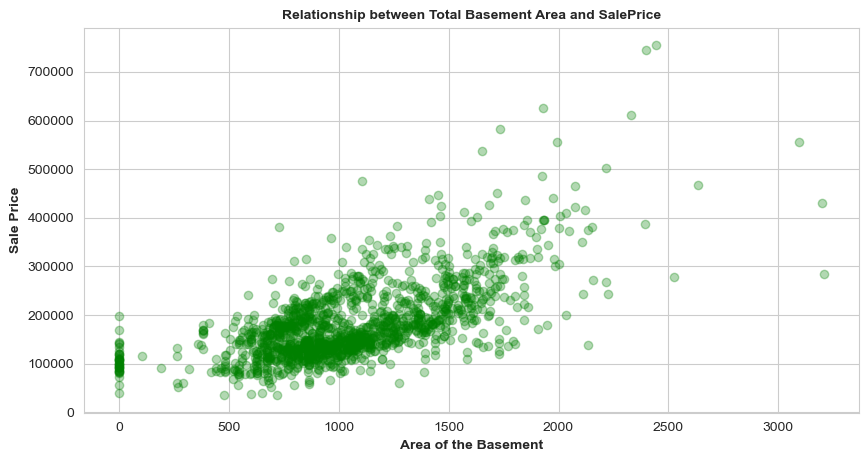

In [75]:
plt.figure(figsize=((10,5)))
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=df, color='green',alpha=0.3)
plt.title('Relationship between Total Basement Area and SalePrice',weight='bold',fontsize=10)
plt.xlabel('Area of the Basement', weight='bold')
plt.ylabel('Sale Price',weight='bold')
plt.show()

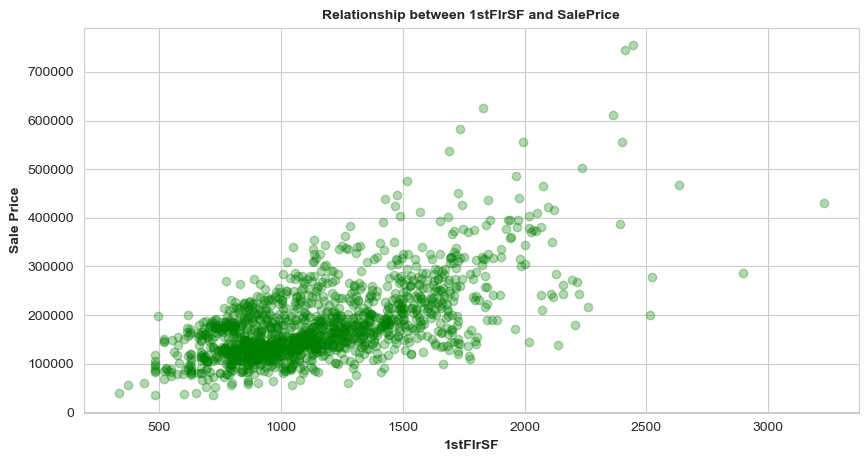

In [78]:
plt.figure(figsize=((10,5)))
plt.scatter(x='1stFlrSF',y='SalePrice',data=df, color='green',alpha=0.3)
plt.title('Relationship between 1stFlrSF and SalePrice',weight='bold',fontsize=10)
plt.xlabel('1stFlrSF', weight='bold')
plt.ylabel('Sale Price',weight='bold')
plt.show()

Making Data In Accordance with assumption of linearity 

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

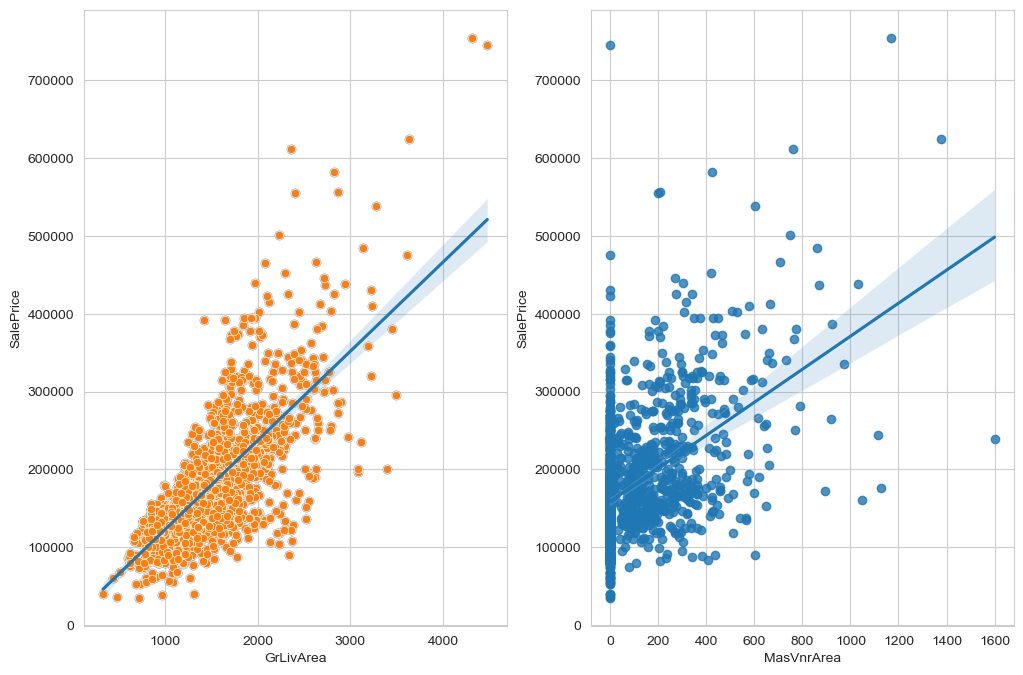

In [79]:
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),ncols=2, sharey=False)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],ax=ax1)
sns.regplot(x=df['GrLivArea'],y=df['SalePrice'],ax=ax1)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],ax=ax1)
sns.regplot(x=df['MasVnrArea'],y=df['SalePrice'],ax=ax2)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

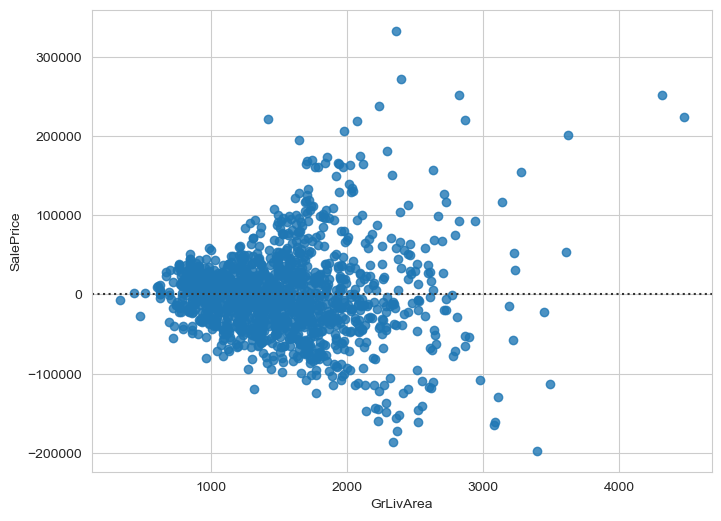

In [83]:
plt.subplots(figsize=(8,6))
sns.residplot(x=df['GrLivArea'],y=df['SalePrice'])

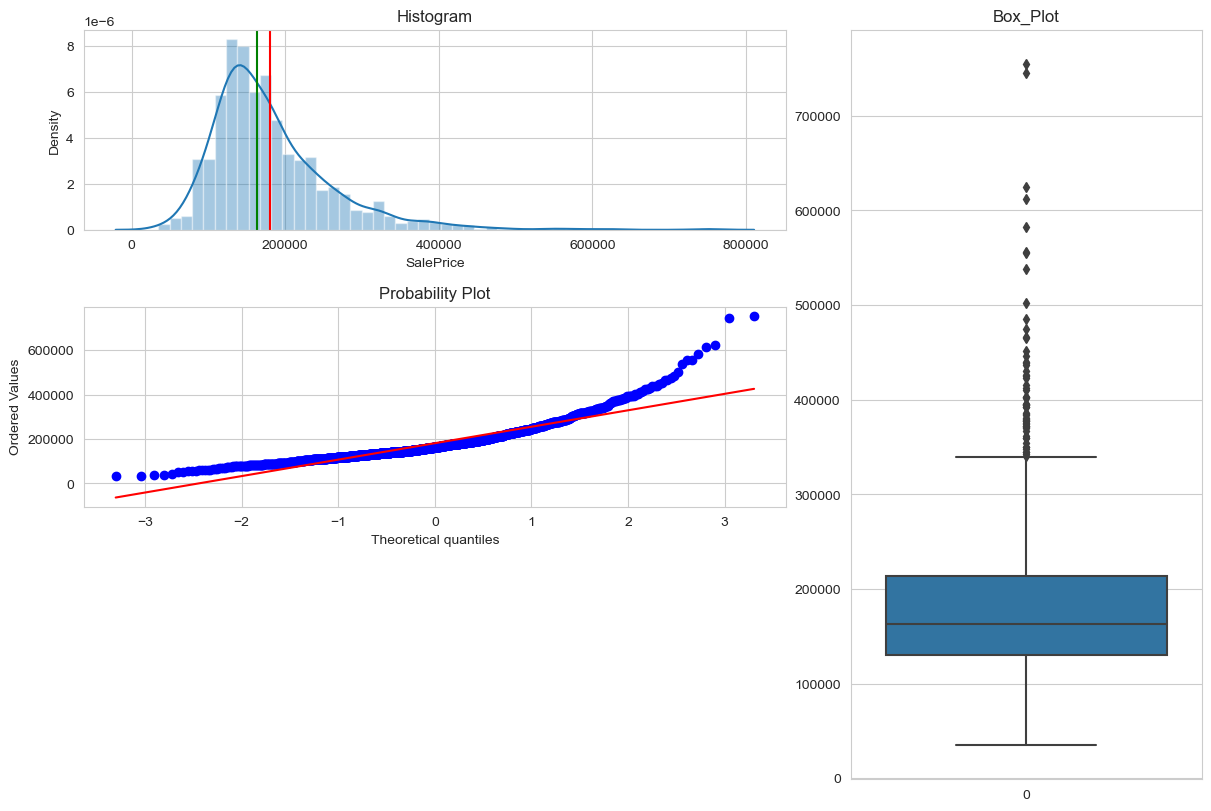

In [84]:
three_chart_plot(df,'SalePrice')

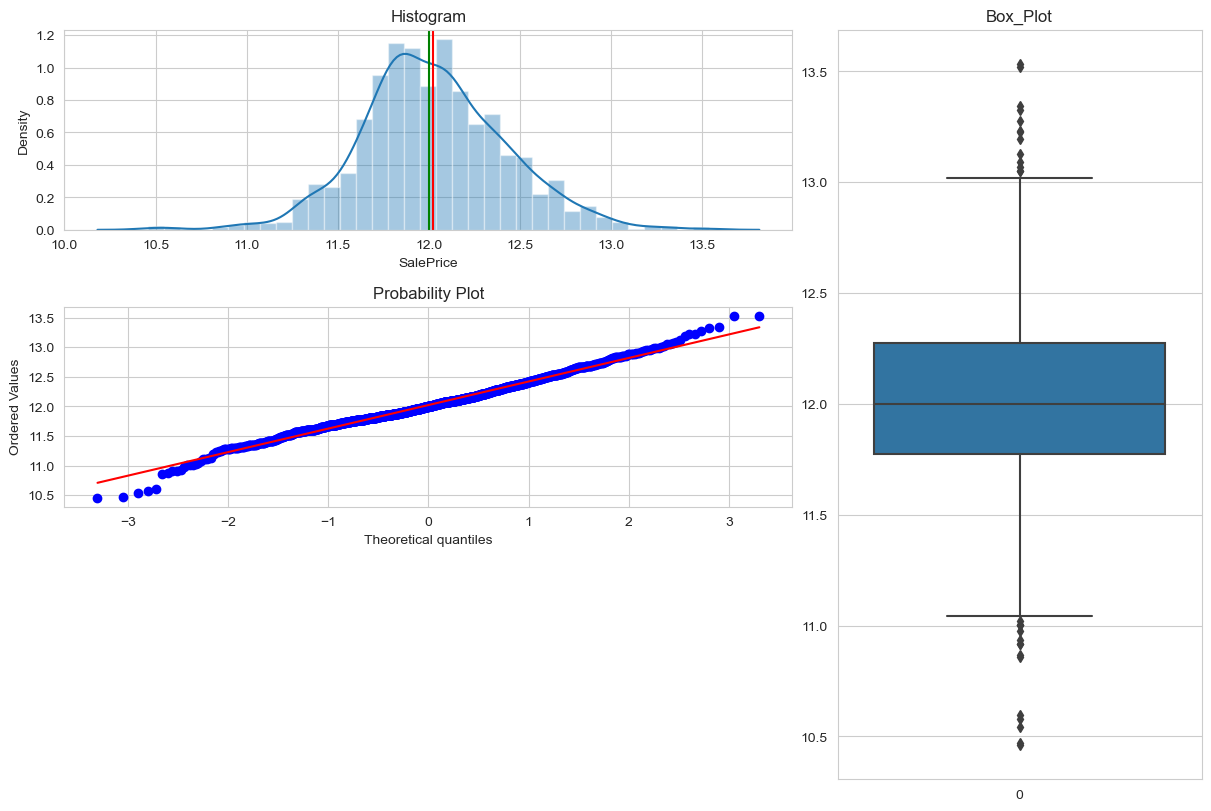

In [85]:
train['SalePrice']=np.log1p(train['SalePrice'])
df=train
three_chart_plot(df,'SalePrice')

<Figure size 1000x800 with 0 Axes>

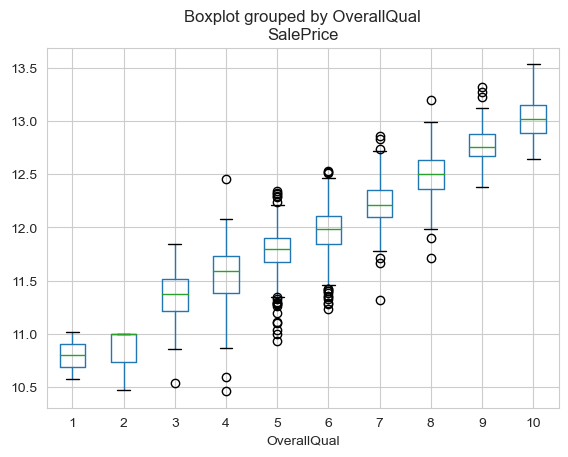

In [86]:
plt.figure(figsize=(10,8))
df.boxplot(by='OverallQual',column='SalePrice')
plt.show()

Exploring Categorical Variables

In [107]:
def horizontal_plot(data, column_name, color, plot_title):
    fig, ax= plt.subplots(figsize=(8,6))
    title_cnt=data[column_name].value_counts().sort_values(ascending=False).reset_index()
    mn=ax.barh(title_cnt.iloc[:,0],title_cnt.iloc[:,1],edgecolor='black',color=sns.color_palette(color, len(title_cnt)))
    
    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)
    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)
    
    #ax.grid(b=True, color='grey', alpha=0.2)
    ax.invert_yaxis()
    
    ax.set_xlabel('Count', weight='bold')
    
    for i in ax.patches:
        ax.text(i.get_width()+1.0,i.get_y()+0.5, str(round((i.get_width()),2)), fontsize=10,fontweight='bold',color='grey')
    
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    
    plt.show()
        

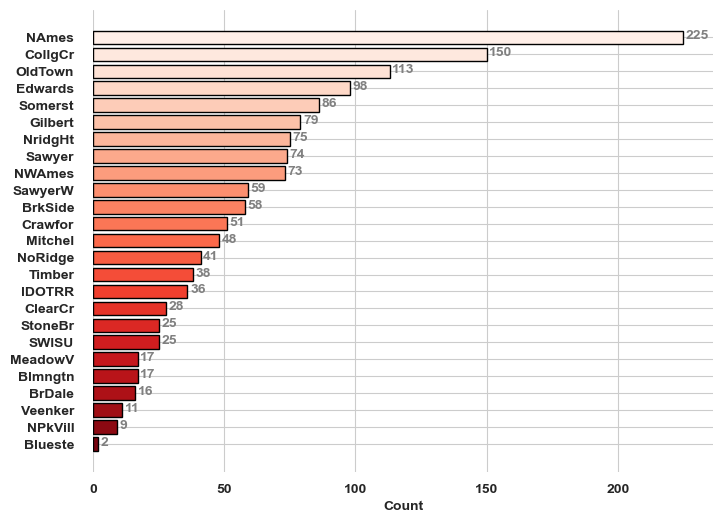

In [108]:
horizontal_plot(df, 'Neighborhood','Reds','Most frequent neighborhoods')

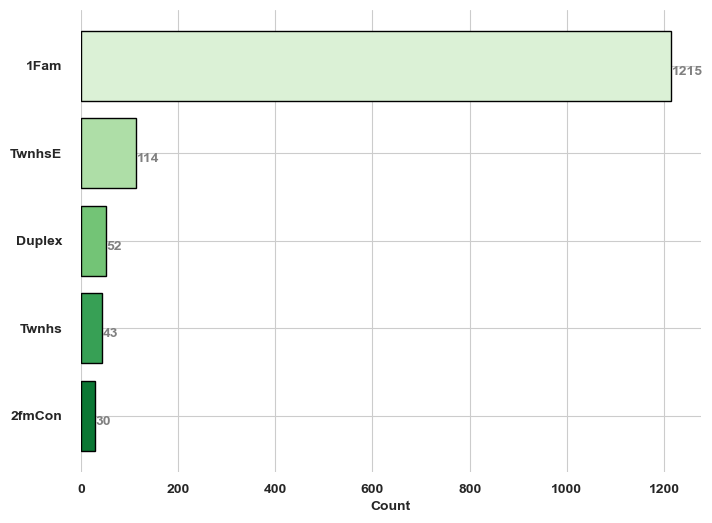

In [109]:
horizontal_plot(df, 'BldgType','Greens','Building type: Type of dwelling')

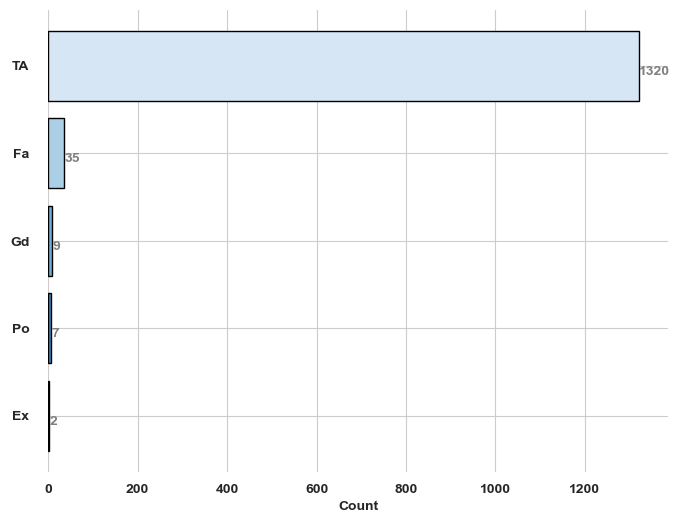

In [110]:
horizontal_plot(df, 'GarageCond','Blues','Garage Conditions')

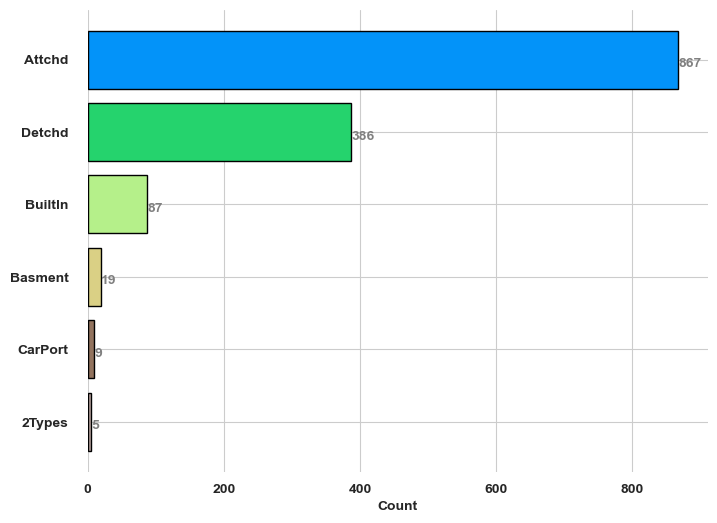

In [111]:
horizontal_plot(df, 'GarageType','terrain','Garage Type')

Feature Engineering

In [112]:
y=df['SalePrice'].reset_index(drop=True)
train_features=df.drop('SalePrice',axis=1)
test_features=test.copy()

features=pd.concat((train_features,test_features)).reset_index(drop=True)

In [113]:
features.shape

(2913, 79)

In [114]:
features['MSSubClass']=features['MSSubClass'].apply(str)
features['MoSold']=features['MoSold'].apply(str)
features['YrSold']=features['YrSold'].apply(str)


In [116]:
null_table(features).sort_values(by='Aproximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Aproximate Percentage of Null Values
59,GarageFinish,159,5.458290
58,GarageYrBlt,159,5.458290
62,GarageQual,159,5.458290
63,GarageCond,159,5.458290
2,LotFrontage,485,16.649502
56,FireplaceQu,1419,48.712667
72,Fence,2342,80.398215
5,Alley,2715,93.202884
73,MiscFeature,2809,96.429797
71,PoolQC,2904,99.691040


In [117]:
features=features.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
features.shape

(2913, 75)

In [119]:
def filling_null(features):
    features['Functional']=features['Functional'].fillna('Typ')
    features['Electrical']=features['Electrical'].fillna(features['Electrical'].mode()[0])
    features['KitchenQual']=features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    features['Exterior1st']=features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd']=features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType']=features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning']=features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    features['LotFrontage']=features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    cat_features=features.select_dtypes(include='object').columns
    num_features=features.select_dtypes(exclude='object').columns
    
    features[cat_features]=features[cat_features].fillna('None')
    features[num_features]=features[num_features].fillna(0)
    
    return features
    

In [120]:
features=filling_null(features)
features.shape

(2913, 75)

In [123]:
features.isnull().sum().sum()

0

Feature Creation

In [124]:
def new_features(features):
    features['HasPool']=features['PoolArea'].apply(lambda x: 1 if x>0 else 0)
    features['Has2ndFloor']=features['2ndFlrSF'].apply(lambda x:1 if x>0 else 0)
    features['HasGarage']=features['GarageArea'].apply(lambda x:1 if x>0 else 0)
    features['HasBsmt']=features['TotalBsmtSF'].apply(lambda x:1 if x>0 else 0)
    features['HasFirePlace']=features['Fireplaces'].apply(lambda x:1 if x>0 else 0)
    
    features['TotalSF']=features['TotalBsmtSF']+features['1stFlrSF']+features['2ndFlrSF']
    
    features['Total_Bathroom']=(features['FullBath'] + (0.5*features['HalfBath']) + 
                               features['BsmtFullBath']+ (0.5*features['BsmtHalfBath']))
    
    features['Total_porch_sf']= (features['OpenPorchSF']+ features['3SsnPorch'] + 
                                features['EnclosedPorch'] + features['ScreenPorch'])
    
    features['YearsSinceRemodel']= features['YrSold'].astype(int)-features['YearRemodAdd'].astype(int)
    
    return features

In [126]:
features=new_features(features)
features.shape

(2913, 84)

In [128]:
num_features=features.select_dtypes(exclude='object').columns

skewed_features=features[num_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skew_features=pd.DataFrame({'Skew Value': skewed_features})

skew_features.head(10)

,Skew Value
MiscVal,21.945678
PoolArea,17.685525
HasPool,15.491975
LotArea,13.169122
LowQualFinSF,12.082312
3SsnPorch,11.369962
KitchenAbvGr,4.299354
BsmtFinSF2,4.143355
EnclosedPorch,4.001309
ScreenPorch,3.943946


In [135]:
def fix_skew(features):
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    numerical_columns=features.select_dtypes(exclude='object').columns
    
    skewed_features=features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    
    high_skew=skewed_features[abs(skewed_features)>0.5]
    skewed_features=high_skew.index
    
    for columns in skewed_features:
        features['columns']=boxcox1p(features[columns],boxcox_normmax(features[columns]+1))
        
    return features

In [136]:
features=fix_skew(features)
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFirePlace,TotalSF,Total_Bathroom,Total_porch_sf,YearsSinceRemodel,columns
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,1,1,0,2566.0,3.5,61,5,16.294381
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,1,1,1,2524.0,2.5,0,31,16.294381
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,1,1,1,2706.0,3.5,42,6,16.294381
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,1,1,1,2473.0,2.0,307,36,16.294381
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,1,1,1,1,3343.0,3.5,84,8,16.294381


In [137]:
features=pd.get_dummies(features).reset_index(drop=True)
features.shape

(2913, 325)

In [138]:
X= features.iloc[:len(y),:]
test=features.iloc[len(y):,:]

In [139]:
X.shape,test.shape,y.shape

((1454, 325), (1459, 325), (1454,))

Training Models

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [154]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train=True):
    if train==True:
        pred=model.predict(x_train_std)
        
        print("Train Result:\n-----------")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train,pred))}")
        print("-----------------------")
        print(f"Mean Squared Error:{mean_squared_error(y_train,pred)}")
        print("---------------------------------")
        print(f"Mean Absolute Error:\n {mean_absolute_error(y_train,pred)}")
        print("------------------------------")
        
        print()
        
    if train==False:
        pred=model.predict(x_test)
            
        print("Test Result :\n-------------------")
        print(f"Root Mean Squared Error :{np.sqrt(mean_squared_error(y_test,pred))}")
        print("--------------------------------")
        print(f"Mean Squared Error:{mean_squared_error(y_test,pred)}")
        print("-----------------------------------")
        print(f"Mean Absolute Error:\n{mean_absolute_error(y_test,pred)}")
        print("----------------------------------")
            
        

In [155]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)
ls.fit(X_train,Y_train)

evaluation(ls, X_train,Y_train,X_test,Y_test,True)
evaluation(ls,X_train,Y_train,X_test,Y_test,False)

Train Result:
-----------
Root Mean Squared Error: 0.15414976605304795
-----------------------
Mean Squared Error:0.023762150374209416
---------------------------------
Mean Absolute Error:
 0.10686991441962437
------------------------------

Test Result :
-------------------
Root Mean Squared Error :0.1517850895383948
--------------------------------
Mean Squared Error:0.023038713406178534
-----------------------------------
Mean Absolute Error:
0.11359050014801465
----------------------------------


In [157]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,Y_train)

evaluation(ridge,X_train,Y_train,X_test,Y_test,True)
evaluation(ridge,X_train,Y_train,X_test,Y_test,False)

Train Result:
-----------
Root Mean Squared Error: 0.09074511448369196
-----------------------
Mean Squared Error:0.00823467580265836
---------------------------------
Mean Absolute Error:
 0.0640549326652983
------------------------------

Test Result :
-------------------
Root Mean Squared Error :0.10486872240037591
--------------------------------
Mean Squared Error:0.010997448937887105
-----------------------------------
Mean Absolute Error:
0.07534566911308406
----------------------------------


In [158]:
import xgboost as xgb
xgb_regress=xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_regress.fit(X_train,Y_train)

evaluation(xgb_regress, X_train,Y_train,X_test,Y_test,True)
evaluation(xgb_regress, X_train,Y_train,X_test,Y_test,False)

Train Result:
-----------
Root Mean Squared Error: 0.0014410018063263214
-----------------------
Mean Squared Error:2.076486205835721e-06
---------------------------------
Mean Absolute Error:
 0.0009924910952602713
------------------------------

Test Result :
-------------------
Root Mean Squared Error :0.11451329181514174
--------------------------------
Mean Squared Error:0.013113294002339808
-----------------------------------
Mean Absolute Error:
0.0851952502994919
----------------------------------
